# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
%matplotlib inline

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)

seed = 42
seed_everything(seed)
warnings.filterwarnings('ignore')
sns.set()

In [110]:
col_names = ["Age group", "Gender", "Category", "Marital status", 'Price', 'Brand name',
       'Aesthetics', 'Technological features', 'Functionality', 'Size',
       'Customisable options', 'Sustainability', "Likelihood", 'Wheels', 'Grilles', 'Headlights', 'Side mirrors', 'Bumpers',
       'Steering wheel', 'Centre compartment', 'Door handles', 'Dashboard', "Amount willing to spend", "Personalisation",
            "Amount willing to pay", "Experience"]
df = pd.read_excel("Product_Survey_Results_Modified.xlsx", index_col=0, parse_dates=True, header=None, names=col_names, skiprows=1)
df = df.reset_index(drop=True).dropna()
df.head()

,Age group,Gender,Category,Marital status,Price,Brand name,Aesthetics,Technological features,Functionality,Size,...,Side mirrors,Bumpers,Steering wheel,Centre compartment,Door handles,Dashboard,Amount willing to spend,Personalisation,Amount willing to pay,Experience
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,0,0,0,1,1,...,0,0,0,1,0,0,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,0,1,1,1,0,...,1,1,0,1,1,1,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,1,1,0,1,1,...,0,0,1,1,1,1,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,1,1,1,1,1,1,...,1,0,0,1,0,0,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,0,0,1,0,1,0,...,1,0,1,0,0,1,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [111]:
# Label encode all suitable categories
age_map = {'20-30': 25,
           '31-40': 35,
           '41-50': 45,
           '51-60': 55}
gender_map = {"Male": 1,
             "Female": 2,
             "Prefer not to say": 0}
category_map = {'Do not own a car, but planning to purchase in future': 0,
               'Own a car': 1,
               'Own more than one car': 2}
status_map = {"Single": 0,
             "Married with no children": 1,
             "Married with children": 2}
likelihood_map = {"Not likely": 0,
                 "Likely": 1,
                 "Very likely": 2}
personalise_map = {"No": 0,
                  "Only with professional help": 1,
                  "Yes": 2}
exp_map = {'No, I would need a designer to model my sketch': 0,
           'Yes, I can design on my own': 1}

df["Age group"] = df["Age group"].map(age_map) # replace age group with mean age per group
df["Gender"] = df["Gender"].map(gender_map)
df["Category"] = df["Category"].map(category_map)
df["Marital status"] = df["Marital status"].map(status_map)
df["Likelihood"] = df["Likelihood"].map(likelihood_map)
df["Personalisation"] = df["Personalisation"].map(personalise_map)
df["Experience"] = df["Experience"].map(exp_map)

In [112]:
# Assuming each range of values in the age group follows a uniform distribution
df["Age"] = df["Age group"].copy()
df["Age"].values[df["Age"] == 25] = np.random.randint(20, 30, size=len(df["Age"].values[df["Age"] == 25]))
df["Age"].values[df["Age"] == 35] = np.random.randint(31, 40, size=len(df["Age"].values[df["Age"] == 35]))
df["Age"].values[df["Age"] == 45] = np.random.randint(41, 50, size=len(df["Age"].values[df["Age"] == 45]))
df["Age"].values[df["Age"] == 55] = np.random.randint(51, 60, size=len(df["Age"].values[df["Age"] == 55]))

In [113]:
# Assuming each range of values in the amount customers are willing to spend on car customisation follows a uniform distribution
df["Amount willing to spend"].values[df["Amount willing to spend"] == "100-500"] = np.random.randint(100, 500, size=len(df["Amount willing to spend"].values[df["Amount willing to spend"] == "100-500"]))
df["Amount willing to spend"].values[df["Amount willing to spend"] == "under 500"] = np.random.randint(0, 500, size=len(df["Amount willing to spend"].values[df["Amount willing to spend"] == "under 500"]))
df["Amount willing to spend"].values[df["Amount willing to spend"] == "500-1000"] = np.random.randint(500, 1000, size=len(df["Amount willing to spend"].values[df["Amount willing to spend"] == "500-1000"]))
df["Amount willing to spend"].values[df["Amount willing to spend"] == "over 1000"] = np.random.randint(1000, size=len(df["Amount willing to spend"].values[df["Amount willing to spend"] == "over 1000"]))

In [114]:
# Regardless, we retain the original categories through label encoding. 
# However, we group the categories "under 500" and "100-500" together.
df["Spending category"] = df["Amount willing to spend"].copy()
df["Spending category"].values[df["Spending category"] <= 500] = 1
df["Spending category"].values[(df["Spending category"] > 500) & (df["Spending category"] <= 1000)] = 2
df["Spending category"].values[df["Spending category"] > 1000] = 3

In [115]:
# Assuming each range of values in the amount customers are willing to pay for personalisation follows a uniform distribution
df["Amount willing to pay"].values[df["Amount willing to pay"] == "100-500"] = np.random.randint(100, 500, size=len(df["Amount willing to pay"].values[df["Amount willing to pay"] == "100-500"]))
df["Amount willing to pay"].values[df["Amount willing to pay"] == "under 500"] = np.random.randint(0, 500, size=len(df["Amount willing to pay"].values[df["Amount willing to pay"] == "under 500"]))
df["Amount willing to pay"].values[df["Amount willing to pay"] == "500-1000"] = np.random.randint(500, 1000, size=len(df["Amount willing to pay"].values[df["Amount willing to pay"] == "500-1000"]))
df["Amount willing to pay"].values[df["Amount willing to pay"] == "over 1000"] = np.random.randint(1000, size=len(df["Amount willing to pay"].values[df["Amount willing to pay"] == "over 1000"]))

In [116]:
# Regardless, we retain the original categories through label encoding. 
# However, we group the categories "under 500" and "100-500" together.
df["Paying category"] = df["Amount willing to pay"].copy()
df["Paying category"].values[df["Paying category"] <= 500] = 1
df["Paying category"].values[(df["Paying category"] > 500) & (df["Paying category"] <= 1000)] = 2
df["Paying category"].values[df["Paying category"] > 1000] = 3

In [123]:
df.head()

,Age group,Gender,Category,Marital status,Price,Brand name,Aesthetics,Technological features,Functionality,Size,...,Centre compartment,Door handles,Dashboard,Amount willing to spend,Personalisation,Amount willing to pay,Experience,Age,Spending category,Paying category
0,25,1,0,0,1,0,0,0,1,1,...,1,0,0,169,1,805,0,21,1,2
1,25,1,0,0,1,0,1,1,1,0,...,1,1,1,565,1,527,0,25,2,2
2,25,1,0,0,1,1,1,0,1,1,...,1,1,1,665,2,774,0,27,2,2
3,25,2,0,0,1,1,1,1,1,1,...,1,0,0,4,1,209,0,21,1,1
4,25,1,0,0,0,0,1,0,1,0,...,0,0,1,690,2,718,1,27,2,2


# Visualising Categorical Variables

In [150]:
cat_df = df.drop(['Amount willing to spend', 'Amount willing to pay', 'Age'], axis=1)
print(f"Number of columns is {len(cat_df.columns)}.")

Number of columns is 26.


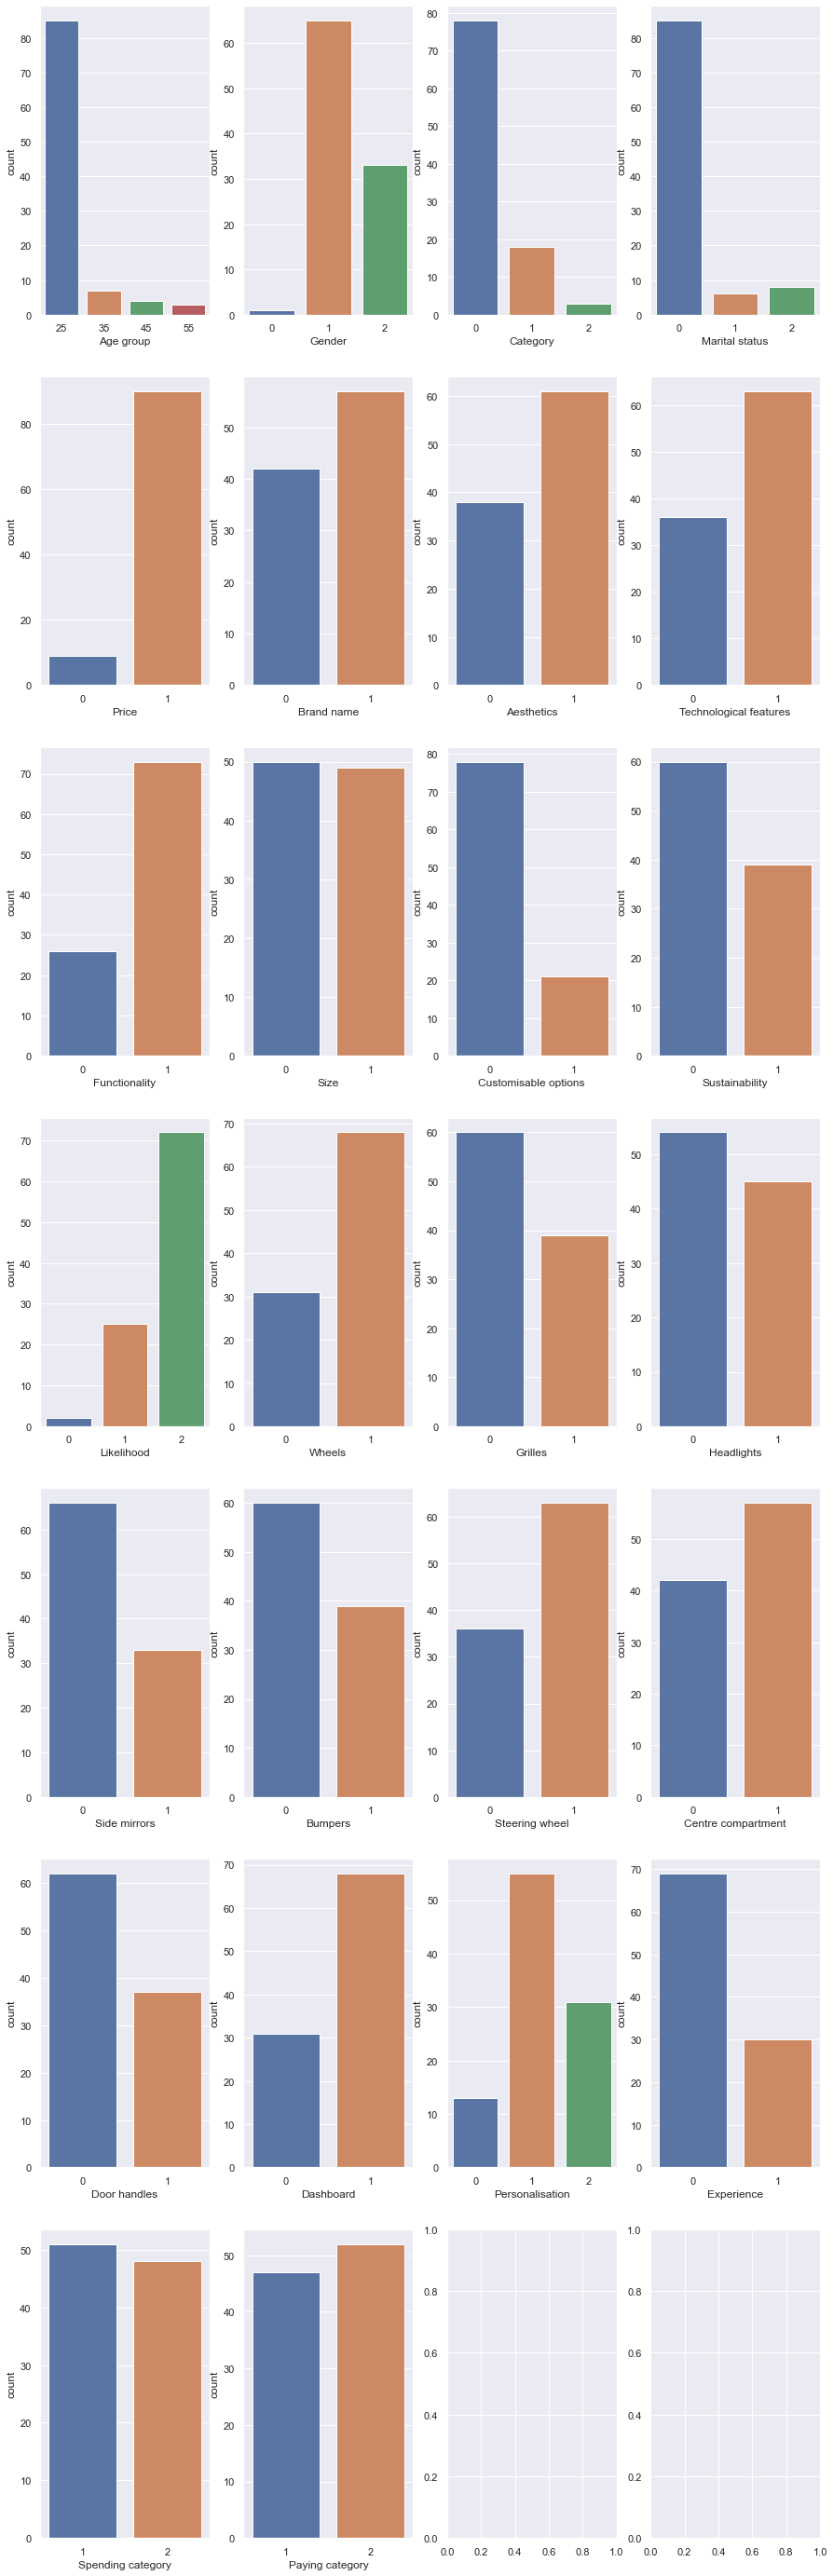

In [165]:
# Plots the distribution of the variables in each category
plots_per_row = 4
f, axes = plt.subplots(7, plots_per_row, figsize=(15,50))
position = 0
for cat in cat_df:
    sns.countplot(x=cat, data=cat_df, ax=axes[position//plots_per_row, position%plots_per_row])
    position+=1